# Creating Graphs for Turnstile Data

## Loading and cleaning for graphing

First we load the modules and then read in the data from part 2: "Finding Station Locations"

In [140]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [141]:
data = pd.read_pickle('data/turns_data_locations.pkl')

Next we addjust the station_id to be more readable

Then aggregate the data by station, date, weekday, and hourgroup from the turnstlile level

Then we classify for weekday / weekend

In [142]:
data['station_id'] = data['Stop Name'] + ' ' + data['Line']

In [143]:
hragg = data.groupby(['station_id','date','wkdaynbr','weekday','timegroup','timegroupstr'],as_index=False)['entries_diff'].sum()

In [144]:
hragg['daytype'] = ['weekend' if x == 0 or x == 6 else 'weekday' for x in hragg['wkdaynbr']]

## Graphing Avg by Station

First we make a function to get us particular slices of the data for graphing

Then we classify the weekdays, hour groups, and color scheme 

In [148]:
def formatforgraph(df,station,index,result):
    """
    Function takes a dataframe, shortens the frame to only 1 station, 
    sets the index for x axis on graph, and pulls the column to graph (result)
    """
    x = df[df['station_id'] == station].set_index([index])
    return x[result]

In [228]:
wkdaylist = ['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
hrgrouplist = ['','12am - 4am','4am - 8am','8am - 12pm','12pm - 4pm','4pm - 8pm','8pm - 12am']
colorlist = ['#DF6633','#67707b','#fb7a28','#ffa744','#939ea3','.80','.80','.80','.80','.80']

For the data, we first need to aggregate by date before we can get the station avg

In [145]:
dateagg = hragg.groupby(['station_id','date'],as_index=False)['entries_diff'].sum()

Once we have the totals by day we can then get the mean daily entries per station / line. 

To only graph the top 10 we sort by avg entries and take the top ten

In [146]:
stationagg = dateagg.groupby(['station_id'])[['entries_diff']].mean()

stationaggten = stationagg.sort_values('entries_diff',ascending = False).head(10)

In [199]:
top10 = [i for i in stationaggten.index]
top5 = [i for i in stationaggten.index[:5]]

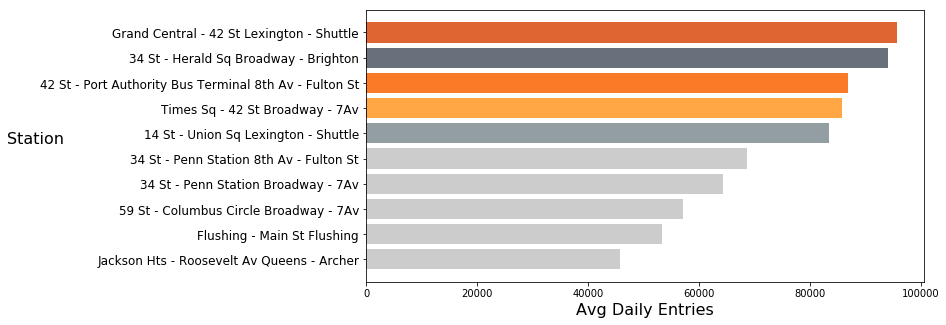

In [221]:
fig, ax = plt.subplots(1, figsize=(10, 5))
y_pos = np.arange(10)
ax.set_yticks(y_pos)
ax.set_yticklabels(top10, fontsize = 12)
ax.set_ylabel('Station',fontsize = 16,rotation = 0)
ax.set_xlabel('Avg Daily Entries',fontsize=16)
ax.barh(y_pos, stationaggten['entries_diff'], color=colorlist, align='center')
ax.invert_yaxis();

## Graphing by Day of Week

We aggregate by Weekday Id and Name by date

We then use the Agg to get the Station avg by Day of week

In [230]:
wkagg = hragg.groupby(['station_id','date','wkdaynbr','weekday'],as_index=False)['entries_diff'].sum()

wkaggavg = wkagg.groupby(['station_id','wkdaynbr','weekday'],as_index=False)[['entries_diff']].mean()
wkaggavg['wkdaynbr'] = [ 7 if x == 0 else x for x in wkaggavg['wkdaynbr']]
wkaggavg = wkaggavg.sort_values('wkdaynbr',ascending = True)

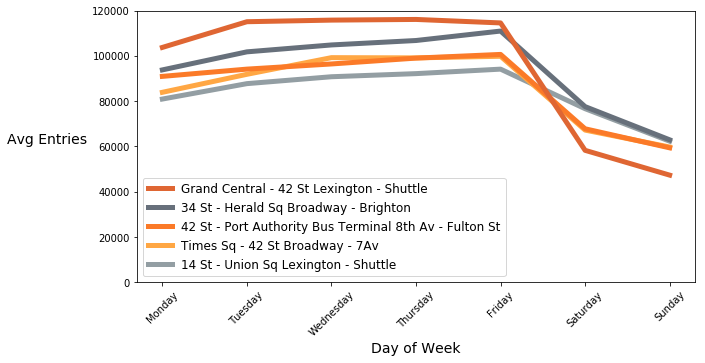

In [244]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(formatforgraph(wkaggavg,top5[4],'wkdaynbr','entries_diff'), color = colorlist[4], label=top5[4], linewidth = 5)
ax.plot(formatforgraph(wkaggavg,top5[3],'wkdaynbr','entries_diff'), color = colorlist[3], label=top5[3], linewidth = 5)
ax.plot(formatforgraph(wkaggavg,top5[2],'wkdaynbr','entries_diff'), color = colorlist[2], label=top5[2], linewidth = 5)
ax.plot(formatforgraph(wkaggavg,top5[1],'wkdaynbr','entries_diff'), color = colorlist[1], label=top5[1], linewidth = 5)
ax.plot(formatforgraph(wkaggavg,top5[0],'wkdaynbr','entries_diff'), color = colorlist[0], label=top5[0], linewidth = 5)
ax.set_xticklabels(wkdaylist, rotation=45, fontsize='medium')
ax.set_ylim(ymin=0,ymax = 120000)
ax.set_xlabel('Day of Week',fontsize=14)
ax.set_ylabel('Avg Entries',rotation=0, fontsize=14, labelpad=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best', prop={'size': 12});

## Graphing by Hour Group

For hour group we can just take the mean of the hour agregate that was created in part 1

We then broke up the averages by weekday / weekend and graphed

In [152]:
hraggavg = hragg.groupby(['station_id','daytype','timegroup','timegroupstr'],as_index=False)[['entries_diff']].mean()

In [153]:
wkendhraggavg = hraggavg[hraggavg['daytype']=='weekend']
wkdayhraggavg = hraggavg[hraggavg['daytype']=='weekday']

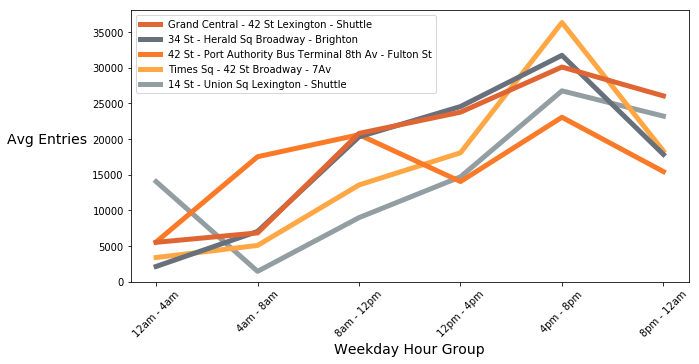

In [251]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(formatforgraph(wkdayhraggavg,top5[4],'timegroup','entries_diff'), color = colorlist[4], label=top5[4], linewidth = 5)
ax.plot(formatforgraph(wkdayhraggavg,top5[3],'timegroup','entries_diff'), color = colorlist[3], label=top5[3], linewidth = 5)
ax.plot(formatforgraph(wkdayhraggavg,top5[2],'timegroup','entries_diff'), color = colorlist[2], label=top5[2], linewidth = 5)
ax.plot(formatforgraph(wkdayhraggavg,top5[1],'timegroup','entries_diff'), color = colorlist[1], label=top5[1], linewidth = 5)
ax.plot(formatforgraph(wkdayhraggavg,top5[0],'timegroup','entries_diff'), color = colorlist[0], label=top5[0], linewidth = 5)
ax.set_xticklabels(hrgrouplist, rotation=45, fontsize='medium')
ax.set_ylim(ymin=0)
ax.set_xlabel('Weekday Hour Group',fontsize=14)
ax.set_ylabel('Avg Entries',rotation=0, fontsize=14, labelpad=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best', prop={'size': 10});

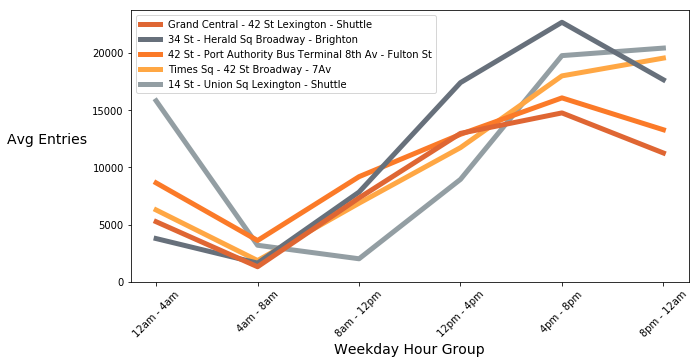

In [250]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(formatforgraph(wkendhraggavg,top5[4],'timegroup','entries_diff'), color = colorlist[4], label=top5[4], linewidth = 5)
ax.plot(formatforgraph(wkendhraggavg,top5[3],'timegroup','entries_diff'), color = colorlist[3], label=top5[3], linewidth = 5)
ax.plot(formatforgraph(wkendhraggavg,top5[2],'timegroup','entries_diff'), color = colorlist[2], label=top5[2], linewidth = 5)
ax.plot(formatforgraph(wkendhraggavg,top5[1],'timegroup','entries_diff'), color = colorlist[1], label=top5[1], linewidth = 5)
ax.plot(formatforgraph(wkendhraggavg,top5[0],'timegroup','entries_diff'), color = colorlist[0], label=top5[0], linewidth = 5)
ax.set_xticklabels(hrgrouplist, rotation=45, fontsize='medium')
ax.set_ylim(ymin=0)
ax.set_xlabel('Weekday Hour Group',fontsize=14)
ax.set_ylabel('Avg Entries',rotation=0, fontsize=14, labelpad=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best', prop={'size': 10});